<a href="https://colab.research.google.com/github/yuki0703-sudo/Research/blob/main/2stream_PredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [ ]:
import numpy as np
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.layers import Input, Dense,SimpleRNN, LSTM,Dropout,Convolution2D,MaxPooling2D
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
import glob 
import os 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Load Data (Value data & Image data)

##Load value data

In [ ]:
#Load data
#train data
file21 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(21))
file22 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(22))
file24 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(24))
file25 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(25))
file26 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(26))
file27 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(27))
file28 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(28))
file29 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(29))
file30 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(30))
file31 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(31))
file32 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(32))
file33 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(33))
file34 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(34))
file35 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(35))
file36 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(36))
file37 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(37))
file38 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(38))
file40 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(40))
file41 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(41))
file44 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(44))
#test data
file23 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(23))
file39 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(39))
file43 = pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/動画/20221020/video/{}.csv".format(43))

#Convert to values
#train
value21 = file21.values
value22 = file22.values
value24 = file24.values
value25 = file25.values
value26 = file26.values
value27 = file27.values
value28 = file28.values
value29 = file29.values
value30 = file30.values
value31 = file31.values
value32 = file32.values
value33 = file33.values
value34 = file34.values
value35 = file35.values
value36 = file36.values
value37 = file37.values
value38 = file38.values
value40 = file40.values
value41 = file41.values
value44 = file44.values
#test
value23 = file23.values
value39 = file39.values
value43 = file43.values

In [ ]:
print(value21.shape[0])
print(value22.shape[0])
print(value23.shape[0])
print(value24.shape[0])
print(value25.shape[0])
print(value26.shape[0])
print(value27.shape[0])
print(value28.shape[0])
print(value29.shape[0])
print(value30.shape[0])
print(value31.shape[0])
print(value32.shape[0])
print(value33.shape[0])
print(value34.shape[0])
print(value35.shape[0])
print(value36.shape[0])
print(value37.shape[0])
print(value38.shape[0])
print(value39.shape[0])
print(value40.shape[0])
print(value41.shape[0])
print(value43.shape[0])
print(value44.shape[0])

244
448
895
245
448
863
235
430
857
233
312
880
236
434
866
240
440
883
240
442
889
447
892


## Process data

###for 9 inputs 9advance

In [ ]:
def process_data(value):
  data = []
  #data range : -17~-9
  for i in range(19,value.shape[0]-17):#total num of data, image dataset starts from 20
    data_tmp = []
    for j in range(9): #input time frame
      data_oneframe = []
      for k in range(value.shape[1]): #data for one fram
        data_oneframe.append(value[i+j][k])#7
      data_tmp.append(data_oneframe)#(9,7)
    data.append(data_tmp)#(total data,9,7)

  data = np.asarray(data)
  print("data shape:{}".format(data.shape))
  appropriate_data = value.shape[0]-36
  print("appropriate data num is {}".format(appropriate_data))
  return data

In [ ]:
train21 = process_data(value21)
train22 = process_data(value22)
test23 = process_data(value23)
train24 = process_data(value24)
train25 = process_data(value25)
train26 = process_data(value26)
train27 = process_data(value27)
train28 = process_data(value28)
train29 = process_data(value29)
train30 = process_data(value30)
train31 = process_data(value31)
train32 = process_data(value32)
train33 = process_data(value33)
train34 = process_data(value34)
train35 = process_data(value35)
train36 = process_data(value36)
train37 = process_data(value37)
train38 = process_data(value38)
test39 = process_data(value39)
train40 = process_data(value40)
train41 = process_data(value41)
test43 = process_data(value43)
train44 = process_data(value44)

data shape:(208, 9, 7)
appropriate data num is 208
data shape:(412, 9, 7)
appropriate data num is 412
data shape:(859, 9, 7)
appropriate data num is 859
data shape:(209, 9, 7)
appropriate data num is 209
data shape:(412, 9, 7)
appropriate data num is 412
data shape:(827, 9, 7)
appropriate data num is 827
data shape:(199, 9, 7)
appropriate data num is 199
data shape:(394, 9, 7)
appropriate data num is 394
data shape:(821, 9, 7)
appropriate data num is 821
data shape:(197, 9, 7)
appropriate data num is 197
data shape:(276, 9, 7)
appropriate data num is 276
data shape:(844, 9, 7)
appropriate data num is 844
data shape:(200, 9, 7)
appropriate data num is 200
data shape:(398, 9, 7)
appropriate data num is 398
data shape:(830, 9, 7)
appropriate data num is 830
data shape:(204, 9, 7)
appropriate data num is 204
data shape:(404, 9, 7)
appropriate data num is 404
data shape:(847, 9, 7)
appropriate data num is 847
data shape:(204, 9, 7)
appropriate data num is 204
data shape:(406, 9, 7)
appropri

In [ ]:
def combine(data1,data2,data3):
  data1 = data1.tolist()
  data2 = data2.tolist()
  data3 = data3.tolist()
  train = []
  for i in range(len(data1)): #(1200,100,20),1200
    temp= []
    for j in range(len(data1[i])):#100
      temp_2 =[]
      for k in range(len(data1[i][j])):#20
        temp_2.append(data1[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  for i in range(len(data2)): #(1200,100,20),1200
    temp= []
    for j in range(len(data2[i])):#100
      temp_2 =[]
      for k in range(len(data2[i][j])):#20
        temp_2.append(data2[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  for i in range(len(data3)): #(1200,100,20),1200
    temp= []
    for j in range(len(data3[i])):#100
      temp_2 =[]
      for k in range(len(data3[i][j])):#20
        temp_2.append(data3[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  train = np.asarray(train)
  print('data shape', train.shape)
  return train

def combine_2(data1,data2):
  data1 = data1.tolist()
  data2 = data2.tolist()
  train = []
  for i in range(len(data1)): #(1200,100,20),1200
    temp= []
    for j in range(len(data1[i])):#100
      temp_2 =[]
      for k in range(len(data1[i][j])):#20
        temp_2.append(data1[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  for i in range(len(data2)): #(1200,100,20),1200
    temp= []
    for j in range(len(data2[i])):#100
      temp_2 =[]
      for k in range(len(data2[i][j])):#20
        temp_2.append(data2[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  train = np.asarray(train)
  print('data shape', train.shape)
  return train

In [ ]:
train_combine1 = combine(train21,train22,train24)
train_combine2 = combine(train25,train26,train27)
train_combine3 = combine(train28,train29,train30)
train_combine4 = combine(train31,train32,train33)
train_combine5 = combine(train34,train35,train36)
train_combine6 = combine(train37,train38,train40)

train_1 = combine(train_combine1,train_combine2,train_combine3)
train_2 = combine(train_combine4,train_combine5,train_combine6)

train_3 = combine(train_1,train_2,train41)

train = combine_2(train_3,train44)

test = combine(test23,test39,test43)

data shape (829, 9, 7)
data shape (1438, 9, 7)
data shape (1412, 9, 7)
data shape (1320, 9, 7)
data shape (1432, 9, 7)
data shape (1657, 9, 7)
data shape (3679, 9, 7)
data shape (4409, 9, 7)
data shape (8941, 9, 7)
data shape (9797, 9, 7)
data shape (1474, 9, 7)


###for 18 inputs 18 advance

In [ ]:
def process_data(value):
  data = []
  #data range : -35~-18
  for i in range(1,value.shape[0]-35):#total num of data, image dataset starts from 37
    data_tmp = []
    for j in range(18): #input time frame
      data_oneframe = []
      for k in range(value.shape[1]): #data for one fram
        data_oneframe.append(value[i+j][k])#7
      data_tmp.append(data_oneframe)#(18,7)
    data.append(data_tmp)#(total data,18,7)

  data = np.asarray(data)
  print("data shape:{}".format(data.shape))
  appropriate_data = value.shape[0]-36
  print("appropriate data num is {}".format(appropriate_data))
  return data

In [ ]:
train21 = process_data(value21)
train22 = process_data(value22)
test23 = process_data(value23)
train24 = process_data(value24)
train25 = process_data(value25)
train26 = process_data(value26)
train27 = process_data(value27)
train28 = process_data(value28)
train29 = process_data(value29)
train30 = process_data(value30)
train31 = process_data(value31)
train32 = process_data(value32)
train33 = process_data(value33)
train34 = process_data(value34)
train35 = process_data(value35)
train36 = process_data(value36)
train37 = process_data(value37)
train38 = process_data(value38)
test39 = process_data(value39)
train40 = process_data(value40)
train41 = process_data(value41)
test43 = process_data(value43)
train44 = process_data(value44)

In [ ]:
def combine(data1,data2,data3):
  data1 = data1.tolist()
  data2 = data2.tolist()
  data3 = data3.tolist()
  train = []
  for i in range(len(data1)): #(1200,100,20),1200
    temp= []
    for j in range(len(data1[i])):#100
      temp_2 =[]
      for k in range(len(data1[i][j])):#20
        temp_2.append(data1[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  for i in range(len(data2)): #(1200,100,20),1200
    temp= []
    for j in range(len(data2[i])):#100
      temp_2 =[]
      for k in range(len(data2[i][j])):#20
        temp_2.append(data2[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  for i in range(len(data3)): #(1200,100,20),1200
    temp= []
    for j in range(len(data3[i])):#100
      temp_2 =[]
      for k in range(len(data3[i][j])):#20
        temp_2.append(data3[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  train = np.asarray(train)
  print('data shape', train.shape)
  return train

def combine_2(data1,data2):
  data1 = data1.tolist()
  data2 = data2.tolist()
  train = []
  for i in range(len(data1)): #(1200,100,20),1200
    temp= []
    for j in range(len(data1[i])):#100
      temp_2 =[]
      for k in range(len(data1[i][j])):#20
        temp_2.append(data1[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  for i in range(len(data2)): #(1200,100,20),1200
    temp= []
    for j in range(len(data2[i])):#100
      temp_2 =[]
      for k in range(len(data2[i][j])):#20
        temp_2.append(data2[i][j][k])
      temp.append(temp_2)
    train.append(temp)
  train = np.asarray(train)
  print('data shape', train.shape)
  return train

In [ ]:
train_combine1 = combine(train21,train22,train24)
train_combine2 = combine(train25,train26,train27)
train_combine3 = combine(train28,train29,train30)
train_combine4 = combine(train31,train32,train33)
train_combine5 = combine(train34,train35,train36)
train_combine6 = combine(train37,train38,train40)

train_1 = combine(train_combine1,train_combine2,train_combine3)
train_2 = combine(train_combine4,train_combine5,train_combine6)

train_3 = combine(train_1,train_2,train41)

train = combine_2(train_3,train44)

test = combine(test23,test39,test43)

## Load Image Data

In [ ]:
## ///////// loading the data as DataFrame ////////////
#20220401
#file=pd.read_csv(filepath_or_buffer="/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/train_dataset_2.csv")
#file_test = pd.read_csv(filepath_or_buffer= "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/test_dataset.csv")

#20220603
file_train = pd.read_csv(filepath_or_buffer = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020/train_9input_9advance.csv")
value_train = file_train.values
file_test = pd.read_csv(filepath_or_buffer = "/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/dataset/20221020/test_9input_9advance.csv")
value_test = file_test.values

## ////////// テスト用とトレーニング用でデータをシャッフルする //////////////
import random #random.shuffle() : shuffle the data of 1D
from sklearn.utils import shuffle #for 2D shuffle

#value_train = shuffle(value_train,random_state=42) #random_state = integer ; fix randomness with shuffling
#value_test = shuffle(value_test,random_state=42)
#print(value_train.shape)

#value_test = shuffle(value_test, random_state =42)
#print(value_test.shape)

## //////////// Show example /////////
import cv2
import matplotlib.pyplot as plt

img=cv2.imread(value_train[100,1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plt.imshow(gray)

## ////// making the dataset for train and test //////////

data_train = value_train[:,1:]
label_train =  value_train[:,0]


data_test = value_test[:,1:]
label_test = value_test[:,0]


print(data_test)
print(label_test)

In [ ]:
def url2image(data):
  image_data = np.zeros((len(data),len(data[1]),64,64))
  for i in range(len(data)-1):
    for j,name in enumerate(data[i]):
      print((len(data),i,j))
      print(name)
      img=cv2.imread(name)
      #print(img)
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      image_data[i][j]=gray
  return image_data

In [ ]:
image_train = url2image(data_train)
image_test = url2image(data_test)

###Process Data

In [ ]:
## split data into training data and test data 
image_train = image_train.reshape(len(image_train),9,64,64,1)
image_test = image_test.reshape(len(image_test),9,64,64,1)

#when calculating (dividing process) the type have to be float
image_train = image_train.astype("float32")
image_test = image_test.astype("float32")

#when training, it is convenient if the values are normalized
image_train= image_train/255
image_test = image_test/255

# converting data to float32, especially float32
image_train =np.asarray(image_train).astype(np.float32)
label_train = np.asarray(label_train).astype(np.int)
image_test =np.asarray(image_test).astype(np.float32)
label_test = np.asarray(label_test).astype(np.int)

print("length of label test : ",len(label_test))

#label_train_tensorflow=keras.utils.to_categorical(label_train)  #keras.utils.to_categorical : can see how the result of the judge is like [0.4,0.6] : no-spatter: 40%, spatter : 60%
#label_test_tensorflow=keras.utils.to_categorical(label_test)
#print(image_train)
print(image_train.shape)
print(type(label_train))
#print(label_train_tensorflow)

length of label test :  1474
(9797, 9, 64, 64, 1)
<class 'numpy.ndarray'>


<ipython-input-12-02acd4bdcbce>:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  label_train = np.asarray(label_train).astype(np.int)
<ipython-input-12-02acd4bdcbce>:17: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated 

###Label data : Scaler to Vector




In [ ]:
# convert label into array(2) [no-spatter, spatter]
def label_vec(label,dim):
  lab = np.zeros((len(label),dim))  
  for i in range(len(label)):
    if label[i] == 1: #spatter
      lab[i,1] = 1
    else: #no spatter
      lab[i,0] = 1
  return lab

lab_train = label_vec(label_train, 2)
lab_test = label_vec(label_test,2)

print("lab_train.shape ; " , lab_train.shape)
print("lab_test.shape : " , lab_test.shape)

lab_train.shape ;  (9797, 2)
lab_test.shape :  (1474, 2)


# Create Model

##Attention Layer

In [ ]:
# Add attention layer to the deep learning network
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e/x.shape[-1]**(1/2))
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context

##Model construction 

In [ ]:
def create_2streamModel(dense_units, input_shape_img,input_shape_f):
    from keras.engine.sequential import model_serialization
    from tensorflow_datasets.core.dataset_builder import units
    from tensorflow import keras
    from tensorflow.keras import Input, Model
    from tensorflow.keras.layers import TimeDistributed, Activation,LayerNormalization,Dense,Concatenate
    from keras import backend as K
    from keras.layers.core import Reshape

    #### image part
    print(input_shape_img)
    inputs_img=Input(shape=input_shape_img)
    conv2d_1 = Convolution2D(4,(3,3),padding = "same")
    outputs = TimeDistributed(conv2d_1)(inputs_img)
    filter_0 = Activation('relu')
    outputs = TimeDistributed(filter_0)(outputs)

    conv2d_2 = Convolution2D(4,(3,3),padding = "same")
    outputs = TimeDistributed(conv2d_2)(outputs)
    filter_1 = Activation('relu')
    outputs = TimeDistributed(filter_1)(outputs)


    pool_0 = MaxPooling2D((2,2))#32*32
    outputs = TimeDistributed(pool_0)(outputs)

    conv2d_3 = Convolution2D(8,(3,3),padding = "same")
    outputs = TimeDistributed(conv2d_3)(outputs)
    filter_2 = Activation('relu')
    outputs = TimeDistributed(filter_2)(outputs)

    conv2d_4 = Convolution2D(8,(3,3),padding = "same")
    outputs = TimeDistributed(conv2d_4)(outputs)
    filter_3 = Activation('relu')
    outputs = TimeDistributed(filter_3)(outputs)


    pool_1 = MaxPooling2D((2,2))#16*16
    outputs = TimeDistributed(pool_1)(outputs)

    outputs = Reshape((outputs.shape[1],outputs.shape[2]*outputs.shape[3]*outputs.shape[4]))(outputs)

    #x = LSTM(32,return_sequences = True)(outputs)
    #x = LayerNormalization()(x)
    #print(x.shape)
    x = LSTM(32)(outputs)
    #x = LayerNormalization()(x)
    x = Dense(2,activation='sigmoid')(x)
    model_x = keras.Model(inputs = inputs_img,outputs = x)
    #################

    #########feature part
    print(input_shape_f)
    inputs_f = Input(shape=input_shape_f)
    #y = LSTM(63,return_sequences=True)(inputs_f)
    #y = LayerNormalization()(y)
    y = LSTM(63)(inputs_f)
    #y = LayerNormalization()(y)
    
    #if want to include attention layer
    #y = LSTM(63,return_sequences=True)(inputs_f) #you have to add "return_sequences = True"
    #attention_layer = attention()(y)

    y = Dense(2,activation='softmax')(y) #(attention_layer)
    model_y = keras.Model(inputs = inputs_f,outputs = y)
    #################

    ########## Concatenate
    concat = Concatenate()([model_x.output,model_y.output])
    output = Dense(dense_units,trainable=True,activation='softmax')(concat)
    #################

    ########### Make Model
    model = keras.Model(inputs = [model_x.input,model_y.input],outputs = [output])

    ######## Compile
    opt = keras.optimizers.Adam(learning_rate = 0.001, decay = 0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])    
    return model    

In [ ]:
import tensorflow as tf
print(tf.keras.layers.Concatenate().__doc__)

In [ ]:
# Create the model with attention, train and evaluate
model = create_2streamModel(dense_units=2, 
                            input_shape_img=image_train.shape[1:],
                            input_shape_f = train.shape[1:])
model.summary()   


#Training

In [ ]:
import tensorflow as tf

NUM_EPOCHS = 60
#model chechpoint
save_dir = '/content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/model/0115.{epoch:03d}-{val_loss:.2f}.hdf5'
Modelcheckpoint = tf.keras.callbacks.ModelCheckpoint(filepath = save_dir, monitor='val_loss', verbose=1, save_best_only=False, mode='auto')

history = model.fit(x=[image_train,train], y=lab_train, epochs=NUM_EPOCHS,
                    validation_data=([image_test, test], lab_test),
                    verbose =1, batch_size =64,callbacks = [Modelcheckpoint]) #we have to convert the type of label_train to np.float by np.asarray(label_train).astype(np.float32)


#plot vonverging process : 
plt.subplots(figsize = (10,5))
plt.plot(history.history["loss"],label = "Loss")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.title("Converging state")
plt.xlabel("epoch")
plt.ylabel("binary_crossentropy")
plt.legend()
plt.show()

# Accuracy
plt.subplots(figsize = (10,5))
plt.plot(history.history['accuracy'], label = "accuracy")
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')  # Y軸ラベル
plt.xlabel('epoch')  # X軸ラベル
plt.grid()
plt.legend(loc='best')
plt.show()

Epoch 1/60
154/154 [==============================] - ETA: 0s - loss: 0.5395 - accuracy: 0.9305
Epoch 1: saving model to /content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/model/0115.001-0.45.hdf5
154/154 [==============================] - 402s 3s/step - loss: 0.5395 - accuracy: 0.9305 - val_loss: 0.4505 - val_accuracy: 0.9837
Epoch 2/60
154/154 [==============================] - ETA: 0s - loss: 0.4156 - accuracy: 0.9758
Epoch 2: saving model to /content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/model/0115.002-0.37.hdf5
154/154 [==============================] - 321s 2s/step - loss: 0.4156 - accuracy: 0.9758 - val_loss: 0.3710 - val_accuracy: 0.9837
Epoch 3/60
154/154 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.9758
Epoch 3: saving model to /content/gdrive/My Drive/YAMAKAWA_LAB/技術補佐員/NN/model/0115.003-0.31.hdf5
154/154 [==============================] - 316s 2s/step - loss: 0.3483 - accuracy: 0.9758 - val_loss: 0.3111 - val_accuracy: 0.9837
Epoch 4/60
154/154 [=====

#Show model structure

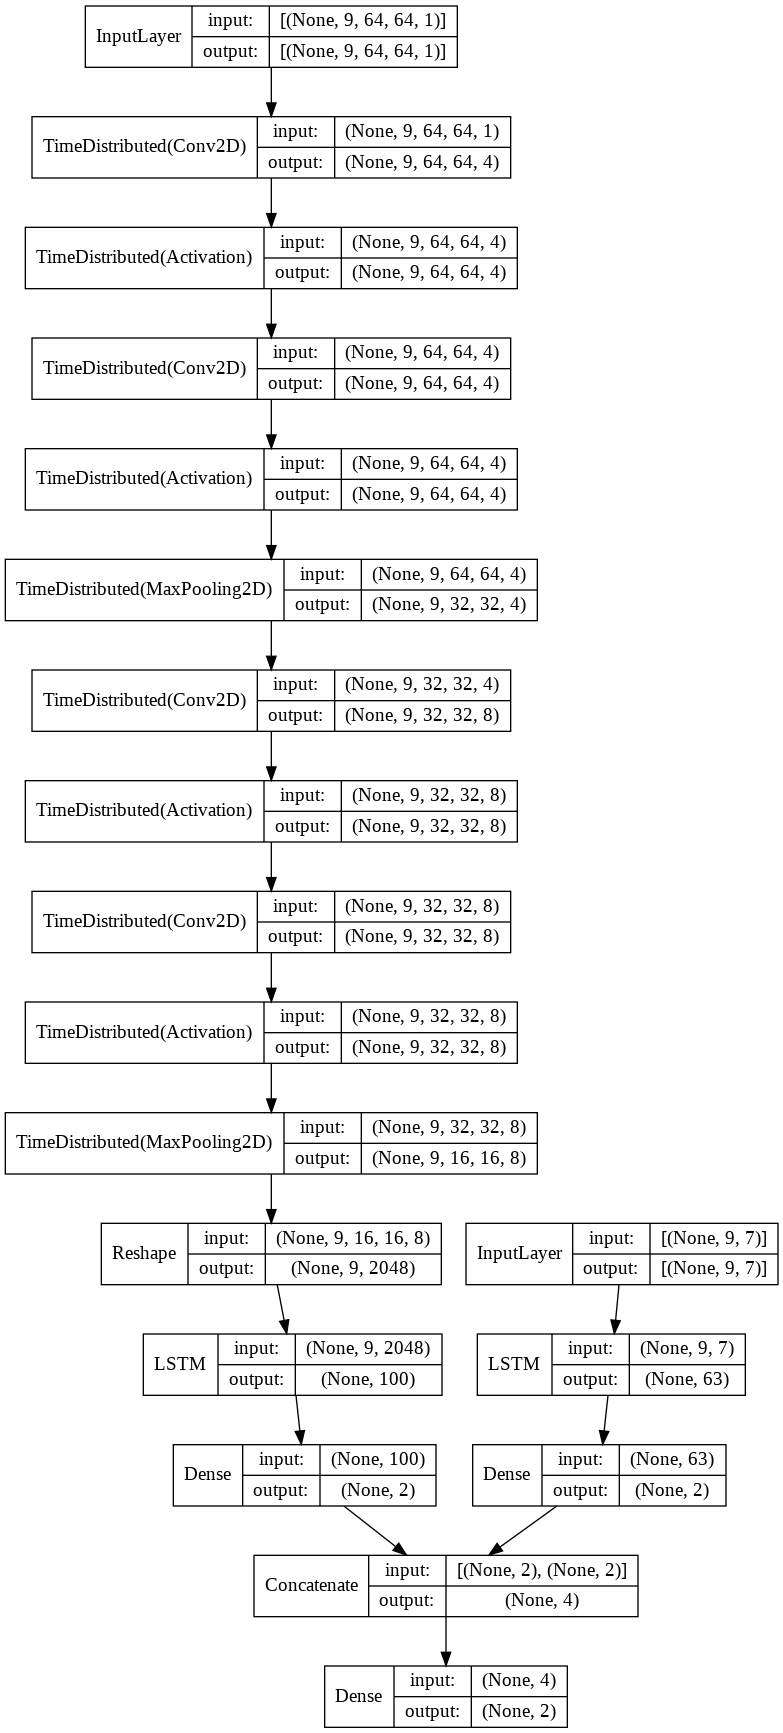

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True,show_layer_names = False)

#Get optimal model

In [ ]:
# get the newest model file within a directory
def getNewestModel(model, dirname):
    from glob import glob
    target = os.path.join(dirname, '*')
    files = [(f, os.path.getmtime(f)) for f in glob(target)]
    if len(files) == 0:
        return model
    else:
        newestModel = sorted(files, key=lambda files: files[1])[-1]
        model.load_weights(newestModel[0])
        return model

optimal_model = getNewestModel(model,save_dir)

score_optimal = optimal_model.evaluate(image_test, label_test, verbose=1)
score = model.evaluate(image_test, label_test, verbose = 1)
print("optimal model accuracy: ",score_optimal)
print("normal model accuracy: ",score)

#Show outputs

##For 1-dimension output

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score,precision_score,recall_score

threshold = 0.5

predict_data = optimal_model.predict(image_test)
print(len(predict_data))
thre_predict = []
for i in range(len(predict_data)):
  if predict_data[i] >= threshold:
    thre_predict.append(1)
  else:
    thre_predict.append(0)
thre_predict = np.asarray(thre_predict)

num = [i for i in range(len(predict_data))]
num = np.asarray(num)
num_test = [i for i in range(len(label_train))]
num_test = np.asarray(num_test)

fig,ax = plt.subplots(figsize = (15,6))
#plt.subplots(figsize = (20,10))
ax.plot(predict_data, "r",linestyle = 'None',marker = 'o',label ='predict data')
ax.plot(label_test, "b",linestyle = 'None', marker = 'o', label = 'raw data')
ax.plot(thre_predict, 'g', linestyle = 'None', marker = 'o', label = ' thresholded data')
plt.axhline(y = threshold)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
plt.show()

print("accuracy : " ,optimal_model.evaluate(image_test, label_test)[1])
print("precision:",precision_score(label_test,thre_predict))
print("recall:",recall_score(label_test,thre_predict))
print("f value:",f1_score(label_test,thre_predict))

from sklearn.metrics import accuracy_score
""" 正解率 """
print(" accuracy of thresholded data : ", accuracy_score(thre_predict, label_test))

##For 2-dimension outputs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score,precision_score,recall_score

threshold = 0.5

#split label data into a scaler
def vec2scaler(data):
  spatter_label = []
  non_label = []
  for i in range(data.shape[0]):
    if data[i][0] == 1: #non spatter
      non_label.append(1)
      spatter_label.append(None)
    else:#spatter
      non_label.append(None)
      spatter_label.append(1)
  return spatter_label,non_label

def show_outputs(data,label_data,model):

  predict_data = model.predict(data)
  predict_0 = predict_data[:,0]
  predict_1 = predict_data[:,1]
  #threshold data
  result = np.zeros((predict_data.shape[0],predict_data.shape[1]))
  for i in range(predict_data.shape[0]):
    judge = np.argmax(predict_data[i,:])
    if judge == 0:
      result[i,0] = 1
    else:
      result[i,1] = 1


  spatter_label,non_label = vec2scaler(label_data)
  spatter_predict,non_predict = vec2scaler(result)

  #evaluation parameter
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(spatter_label)):

    if spatter_label[i] == 1:
      if spatter_predict[i] == 1:#TP
        TP +=1
      elif non_predict[i] == 1: #FN
        FN +=1
    elif non_label[i] == 1:
      if spatter_predict[i] == 1:#FP
        FP += 1
      elif non_predict[i] == 1:#TN
        TN += 1

  print("(TP,FN,FP,TN)",(TP,FN,FP,TN))

  all = len(spatter_label)
  print(all)
  accuracy = (TP+TN)/all
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  f_value = 2/(1/precision+1/recall)


  #plot non-spatter data
  plt.subplot(2,1,1)
  fig,ax = plt.subplots(figsize = (15,7))
  #plt.subplots(figsize = (20,10))
  ax.plot(predict_0, "r",linestyle = 'None',marker = 'o',label ='predict data')
  ax.plot(non_label, "b",linestyle = 'None', marker = 'o', label = 'raw data')
  ax.set_title('Non spatter')
  plt.axhline(y = threshold)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
  plt.show()

  plt.subplot(2,1,2)
  fig,ax = plt.subplots(figsize=(15,7))
  #plt.subplots(figsize = (20,10))
  ax.plot(predict_1, "r",linestyle = 'None',marker = 'o',label ='predict data')
  ax.plot(spatter_label, "b",linestyle = 'None', marker = 'o', label = 'raw data')
  ax.set_title('Spatter')
  plt.axhline(y = threshold)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
  plt.show()

  print("accuracy : " ,accuracy)
  print("precision:",precision)
  print("recall:",recall)
  print("f value:",f_value)

In [ ]:
show_outputs(image_train,lab_train,model=model)
show_outputs(image_test,lab_test,model=model)